In [1]:
import pandas as pd
col_list = ["date","price"]
dr = pd.read_csv("C:/Users/ASUS/Documents/Machine Learning/Grocery/Dhaka Division/Rice Course Dhaka.csv",usecols=col_list,parse_dates = ['date'])
cr = pd.read_csv("C:/Users/ASUS/Documents/Machine Learning/Grocery/Chattagram Division/Rice Course Chattagram.csv",usecols=col_list,parse_dates = ['date'])
rr = pd.read_csv("C:/Users/ASUS\Documents/Machine Learning/Grocery/Rajshahi Division/Rice Rajshahi.csv",usecols=col_list,parse_dates = ['date'])
kr = pd.read_csv("C:/Users/ASUS/Documents/Machine Learning/Grocery/Khulna Division/Rice Khulna.csv",usecols=col_list,parse_dates = ['date'])
br = pd.read_csv("C:/Users/ASUS/Documents/Machine Learning/Grocery/Barishal Division/Rice Course Barishal.csv",usecols=col_list,parse_dates = ['date'])
sr = pd.read_csv("C:/Users/ASUS/Documents/Machine Learning/Grocery/Sylhet Division/Rice Sylhet.csv",usecols=col_list,parse_dates = ['date'])


In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import sys
import numpy as np
import time
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce

from darts import TimeSeries
from darts .utils.statistics import check_seasonality, plot_acf, plot_residuals_analysis

In [3]:
series_dr = TimeSeries.from_dataframe(dr, 'date','price',fill_missing_dates=True, freq='SM')#
series_cr = TimeSeries.from_dataframe(cr, 'date','price',fill_missing_dates=True, freq='SM')#
series_rr = TimeSeries.from_dataframe(rr, 'date','price',fill_missing_dates=True, freq='SM')#
series_kr = TimeSeries.from_dataframe(kr, 'date','price',fill_missing_dates=True, freq='SM')#
series_br = TimeSeries.from_dataframe(br, 'date','price',fill_missing_dates=True, freq='SM')#
series_sr = TimeSeries.from_dataframe(sr, 'date','price',fill_missing_dates=True, freq='SM')#

series_dr.head()

<TimeSeries (DataArray) (date: 5, component: 1, sample: 1)>
array([[[14.]],

       [[nan]],

       [[14.]],

       [[nan]],

       [[14.]]])
Coordinates:
  * date       (date) datetime64[ns] 2004-01-15 2004-01-31 ... 2004-03-15
  * component  (component) object 'price'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

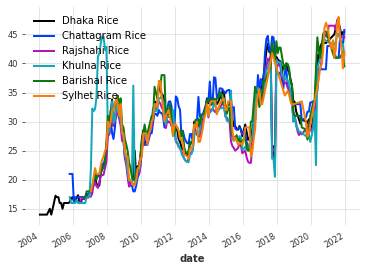

In [4]:
import darts
series_dr = darts.utils.missing_values.fill_missing_values(series_dr, fill='auto',)
series_cr = darts.utils.missing_values.fill_missing_values(series_cr, fill='auto',)
series_rr = darts.utils.missing_values.fill_missing_values(series_rr, fill='auto',)
series_kr = darts.utils.missing_values.fill_missing_values(series_kr, fill='auto',)
series_br = darts.utils.missing_values.fill_missing_values(series_br, fill='auto',)
series_sr = darts.utils.missing_values.fill_missing_values(series_sr, fill='auto',)

series_dr.plot(label = 'Dhaka Rice')
series_cr.plot(label = 'Chattagram Rice')
series_rr.plot(label = 'Rajshahi Rice')
series_kr.plot(label = 'Khulna Rice')
series_br.plot(label = 'Barishal Rice')
series_sr.plot(label = 'Sylhet Rice')
plt.legend()

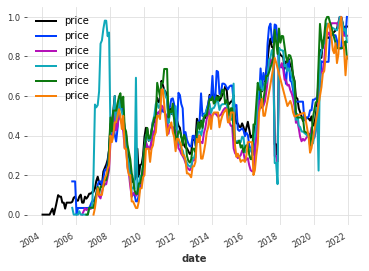

In [5]:
from darts.dataprocessing.transformers import Scaler

scaler = Scaler()
tsdr = scaler.fit_transform(series_dr)
tscr = scaler.fit_transform(series_cr)
tsrr = scaler.fit_transform(series_rr)
tskr = scaler.fit_transform(series_kr)
tsbr = scaler.fit_transform(series_br)
tssr = scaler.fit_transform(series_sr)

tsdr.plot()
tscr.plot()
tsrr.plot()
tskr.plot()
tsbr.plot()
tssr.plot()
